# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_1=pd.merge(study_results, mouse_metadata, how = 'left', on='Mouse ID')

# Display the data table for preview
merged_data_1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
merged_data_1['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
unique_id_data = merged_data_1.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data_1[merged_data_1.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

#duplicate_data = merged_data_1[merged_data_1.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]

duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = merged_data_1[merged_data_1['Mouse ID'] != 'g989']

cleaned_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame. 248
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = merged_data_1.groupby('Drug Regimen')
summary_stats = grouped_data.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'SEM']
summary_stats

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = grouped_data.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std. Dev.', 'SEM']
summary_stats

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

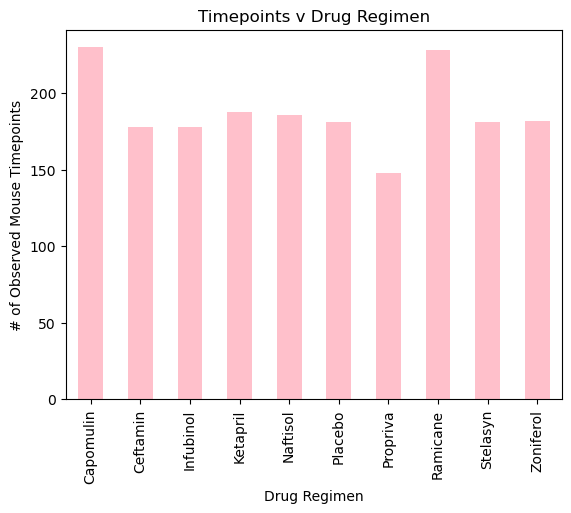

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_df.groupby('Drug Regimen').size()
drug_regimen_counts.plot(kind='bar', color='pink', align = 'center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Timepoints v Drug Regimen')
plt.show()

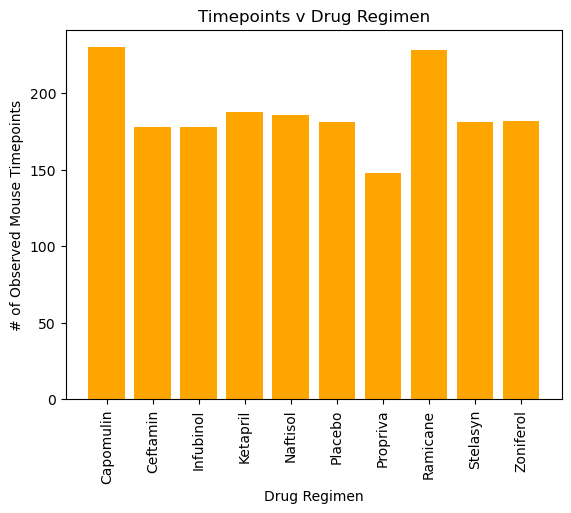

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts_2 = cleaned_df.groupby('Drug Regimen').size()
plt.bar(drug_regimen_counts_2.index, drug_regimen_counts_2, color = 'orange')
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Timepoints v Drug Regimen')
plt.show()

<Axes: title={'center': 'Sex'}>

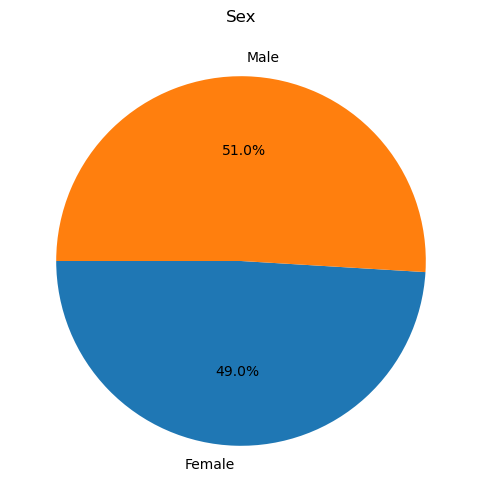

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_pie=cleaned_df.groupby('Sex').size()
sex_pie.plot.pie(y='Count', labels=cleaned_df['Sex'], autopct='%1.1f%%', startangle=180, figsize=(6, 6), title = 'Sex')

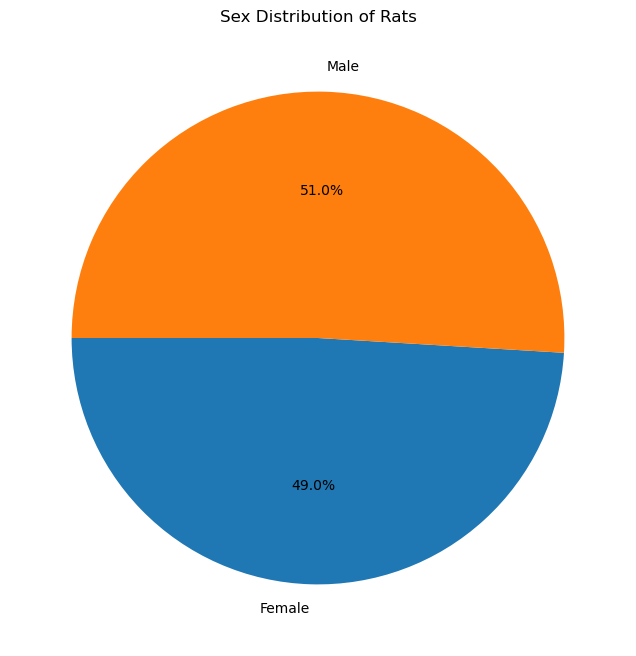

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pie_2=cleaned_df.groupby('Sex').size()
#plt.figure(figsize=(8, 8))
#plt.pie(sex_pie_2, labels=sex_pie_2['Sex'], autopct='%1.1f%%', startangle=140,)
plt.figure(figsize=(8, 8))
plt.pie(sex_pie_2, labels=sex_pie_2.index, autopct='%1.1f%%', startangle=180)
plt.title('Sex Distribution of Rats')
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_df[cleaned_df['Drug Regimen'].isin(selected_regimens)]
grouped_regimens=filtered_data.groupby(['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)'].last()
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

#last_timepoints_data = pd.merge(max_timepoints, cleaned_df, on=['Mouse ID', 'Timepoint'], how='inner')
#merged_data = pd.merge(last_timepoints_data, original_data, on=['Mouse ID', 'Timepoint'], how='inner')



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Timepoint_Tumor_df = pd.merge(max_timepoints, cleaned_df, on=['Mouse ID', 'Timepoint'], how='inner')
Timepoint_Tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = Timepoint_Tumor_df['Timepoint'].quantile(0.25)
Q3 = Timepoint_Tumor_df['Timepoint'].quantile(0.75)

IQR = Q3 - Q1

# Determine the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#outliers = Timepoint_Tumor_df[(Timepoint_Tumor_df['Timepoint'] < lower_bound) | (Timepoint_Tumor_df['Timepoint'] > upper_bound)]



    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_df = Timepoint_Tumor_df[Timepoint_Tumor_df['Drug Regimen'] == treatment]
    tumor_volumes = treatment_df['Tumor Volume (mm3)'].tolist()
    tumor_vol_data.append(tumor_volumes)
            
    # add subset 
    subset_data = Timepoint_Tumor_df.loc[(Timepoint_Tumor_df['Drug Regimen'] == 'Capomulin') & (Timepoint_Tumor_df['Tumor Volume (mm3)'] < 40)]


    # Determine outliers using upper and lower bounds
Q1 = Timepoint_Tumor_df['Tumor Volume (mm3)'].quantile(0.25)
Q3 = Timepoint_Tumor_df['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find potential outliers based on the lower and upper bounds
outliers = Timepoint_Tumor_df[(Timepoint_Tumor_df['Tumor Volume (mm3)'] < lower_bound) | (Timepoint_Tumor_df['Tumor Volume (mm3)'] > upper_bound)]

# Display the potential outliers
print("Potential Outliers:")
print(outliers)

    
    # Identify potential outliers for the current treatment

Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


ValueError: Dimensions of labels and X must be compatible

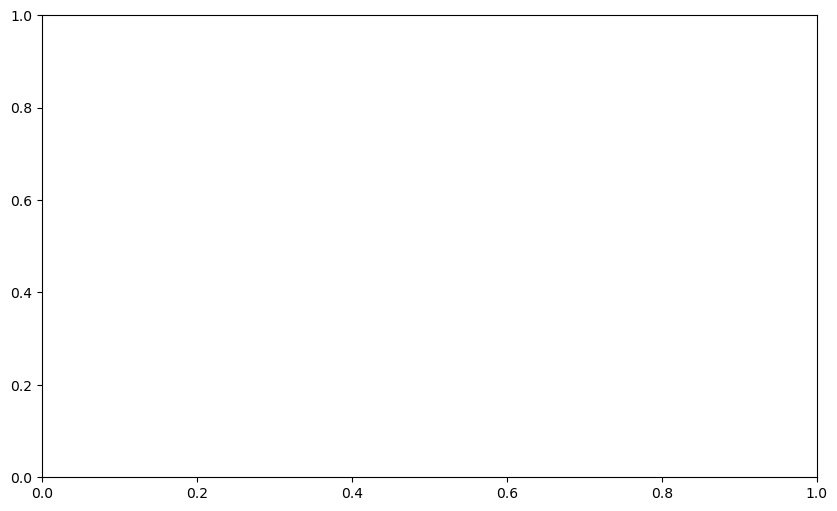

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
data = ['tumor_volumes']
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=labels, patch_artist=True, showmeans=True)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume')
plt.grid(axis='y')

plt.show()



# Assuming you have a DataFrame named 'data' with columns 'Treatment' and 'Tumor Volume (mm3)'
# Filter the data for the specific treatment groups: Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a list of tumor volumes for each treatment group
tumor_volume_data = [data[data['Treatment'] == 'Capomulin']['Tumor Volume (mm3)'],
                     data[data['Treatment'] == 'Ramicane']['Tumor Volume (mm3)'],
                     data[data['Treatment'] == 'Infubinol']['Tumor Volume (mm3)'],
                     data[data['Treatment'] == 'Ceftamin']['Tumor Volume (mm3)']]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [89]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_subj = ['a262']
capomulin_data = Timepoint_Tumor_df[(Timepoint_Tumor_df['Drug Regimen'] == 'Placebo') & (cleaned_df['Mouse ID'] == mouse_subj)]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='b', label=f'Mouse {mouse_subj}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_subj} (Capomulin)')
plt.legend()
plt.grid(True)
plt.show()

ValueError: ('Lengths must match to compare', (1880,), (1,))

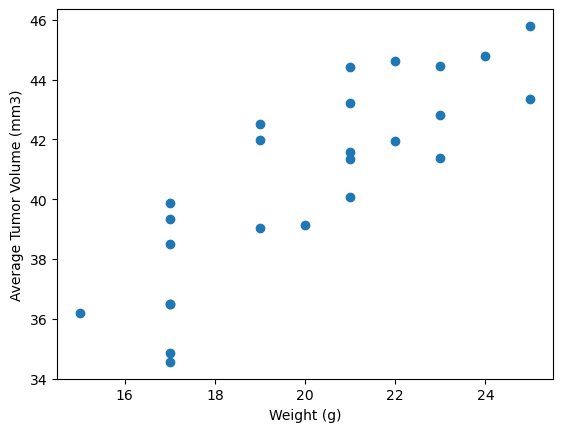

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


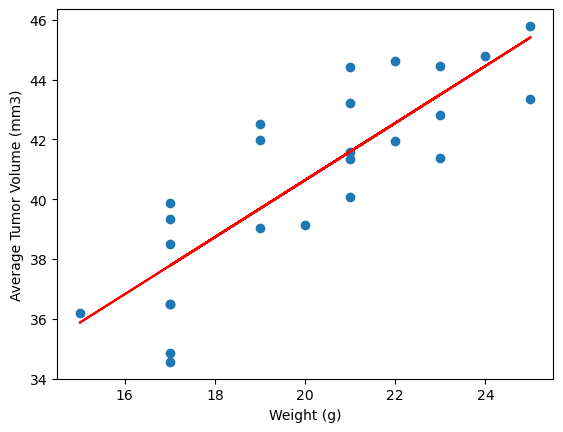

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
